<a href="https://colab.research.google.com/github/qkrwoghd04/ViT_For_ImageCaptionnng_Implementation/blob/master/practice/CNN_Architecture_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CNN Architecture Practice

Distinguishing between a person **sleeping** and a person **falling down**



In [ ]:
!pip install --upgrade keras # keras upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.1.1 which is incompatible.


In [9]:
pip install split-folders

## Initialization

In [2]:
folder_path = r"/content/drive/MyDrive/image_dataset" # image_dataset > [Fall, Sleep] 폴더 존재

In [5]:
import os
import shutil

# limit은 원하는 갯수만큼
def rename_and_move_files(source_folder, target_folder, prefix, limit=20):
    # 폴더 내의 파일 목록을 가져옵니다.
    files = os.listdir(source_folder)
    # 파일 이름 변경 및 이동을 위한 카운터
    count = 0

    for file_name in files:
        # 지정된 개수만큼만 처리
        if count < limit:
            # 새 파일 이름 생성
            new_name = f"{prefix}_{str(count+1).zfill(3)}.jpg"
            # 원본 파일의 전체 경로
            original_path = os.path.join(source_folder, file_name)
            # 새 파일을 저장할 경로
            new_path = os.path.join(target_folder, new_name)
            # 파일 복사 (shutil.move를 사용하면 원본에서 삭제됨)
            shutil.copy(original_path, new_path)
            print(f"Copied and renamed {file_name} to {new_path}")
            count += 1
        else:
            break



In [6]:
# 원본 폴더 경로
fall_source_folder = os.path.join(folder_path, 'Fall_test')
sleep_source_folder = os.path.join(folder_path, 'Sleep_test')

# 타겟 폴더 경로
sleep_target_folder =  os.path.join(folder_path, 'processed/Sleep_test')
fall_target_folder =  os.path.join(folder_path, 'processed/Fall_test')

# 필요한 폴더가 없으면 생성
os.makedirs(sleep_target_folder, exist_ok=True)
os.makedirs(fall_target_folder, exist_ok=True)

# 'Sleep' 폴더 내 파일 처리
rename_and_move_files(sleep_source_folder, sleep_target_folder, 'Sleep', 200)

# 'Fall' 폴더 내 파일 처리
rename_and_move_files(fall_source_folder, fall_target_folder, 'Fall', 200)



Copied and renamed img_112.png to /content/drive/MyDrive/image_dataset/processed/Sleep_test/Sleep_001.jpg
Copied and renamed img_347.png to /content/drive/MyDrive/image_dataset/processed/Sleep_test/Sleep_002.jpg
Copied and renamed img_100.png to /content/drive/MyDrive/image_dataset/processed/Sleep_test/Sleep_003.jpg
Copied and renamed img_109.png to /content/drive/MyDrive/image_dataset/processed/Sleep_test/Sleep_004.jpg
Copied and renamed img_344.png to /content/drive/MyDrive/image_dataset/processed/Sleep_test/Sleep_005.jpg
Copied and renamed img_359.png to /content/drive/MyDrive/image_dataset/processed/Sleep_test/Sleep_006.jpg
Copied and renamed img_332.png to /content/drive/MyDrive/image_dataset/processed/Sleep_test/Sleep_007.jpg
Copied and renamed img_340.png to /content/drive/MyDrive/image_dataset/processed/Sleep_test/Sleep_008.jpg
Copied and renamed img_092.png to /content/drive/MyDrive/image_dataset/processed/Sleep_test/Sleep_009.jpg
Copied and renamed img_353.png to /content/dri

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# import cv2
# import os

# # 비디오 파일이 있는 폴더
# video_folder = r'/content/drive/MyDrive/dataset_action_split/train/Lying Down'
# # 이미지를 저장할 폴더
# output_folder = r'/content/drive/MyDrive/dataset_action_split/video_to_image'

# # 출력 폴더가 없으면 생성
# if not os.path.exists(output_folder):
#     os.makedirs(output_folder)

# # 주어진 폴더에서 'video_xxx' 형식의 파일만 찾기
# for filename in os.listdir(video_folder):
#     if filename.startswith("video_") and filename.endswith(".avi"):  # 'video_xxx.mp4' 형식 확인
#         video_path = os.path.join(video_folder, filename)

#         # 비디오 파일 읽기
#         cap = cv2.VideoCapture(video_path)
#         if not cap.isOpened():
#             print(f"Error opening video file: {filename}")
#             continue

#         total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#         middle_frame = int(total_frames / 2)
#         cap.set(cv2.CAP_PROP_POS_FRAMES, middle_frame)

#         # 프레임 읽기
#         ret, frame = cap.read()
#         if ret:
#             # 이미지 파일로 저장
#             image_path = os.path.join(output_folder, filename.replace('.avi', '.jpg'))
#             cv2.imwrite(image_path, frame)
#             print(f"Image saved at {image_path}")
#         else:
#             print(f"Error: Can't read frame from {filename}")

#         cap.release()


In [11]:
import splitfolders

seed = 1337

splitfolders.ratio(r'/content/drive/MyDrive/image_dataset/processed' , output=r'/content/drive/MyDrive/image_dataset_splited',seed=seed, ratio=(0.8,0.2))

Copying files: 400 files [00:07, 53.85 files/s]


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### **이 매개변수들은 ImageDataGenerator를 사용할 때 이미지 데이터 증강(Image Data Augmentation)을 위해 설정하는 옵션입니다. 데이터 증강은 모델의 일반화 능력을 향상시키기 위해 실제 데이터셋에 없는 이미지 변형을 생성하는 기법입니다.**

1. **rescale=1./255**: 이미지의 각 픽셀 값을 0과 1 사이로 스케일링합니다. 일반적으로 이미지 픽셀 값은 0~255 사이의 값을 가지므로, 이를 255로 나누어 정규화합니다.

2. **rotation_range=180**: 이미지를 무작위로 최대 180도까지 회전시킵니다. 이는 이미지가 약간 기울어진 상태에서도 패턴을 인식할 수 있게 해줍니다.

3. **width_shift_range=0.2**: 이미지를 수평으로 최대 이미지 너비의 20%까지 무작위로 이동시킵니다. 이는 이미지의 위치가 다소 변해도 패턴을 인식할 수 있게 해줍니다.

4. **height_shift_range=0.2**: 이미지를 수직으로 최대 이미지 높이의 20%까지 무작위로 이동시킵니다. 수직 방향의 위치 변화에도 모델이 강인하게 만듭니다.

5. **shear_range=0.2**: 이미지를 시계 반대 방향으로 최대 20%까지 변형시킵니다(전단 변환). 이미지의 형태가 약간 비틀려져도 패턴을 인식할 수 있게 해줍니다.

6. **zoom_range=0.2**: 이미지를 80%에서 120% 사이의 크기로 무작위로 확대/축소합니다.

7. **horizontal_flip=True**: 이미지를 수평 방향으로 무작위로 뒤집습니다.

8. **fill_mode='nearest**': 이미지를 회전, 이동 또는 줌할 때 생기는 빈 공간을 채우는 방법입니다. 'nearest'는 빈 공간에 가장 가까운 픽셀 값을 사용하여 채우는 방식을 의미합니다.

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [37]:
image_size = (224, 224)
batch_size = 16

# train 데이터셋 불러오기 및 자동 라벨링
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/image_dataset_splited/train',  # 훈련 데이터셋 디렉토리
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# validation 데이터셋 불러오기 및 자동 라벨링
validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/image_dataset_splited/val',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# 테스트 데이터셋 불러오기 및 자동 라벨링
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/image_dataset_splited/test',  # 테스트 데이터셋 디렉토리
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # 이진 분류 문제
    shuffle=False  # 평가 시에는 데이터를 섞지 않음
)


Found 320 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


### Keras Models API
[Keras](https://keras.io/api/models/model/)

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import datasets, layers, models
import tensorflow as tf

> #### 간단한 **Squential모델**로 Stand와 Fall 분류의 정확도 파악하기

In [39]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # 이진 분류를 위한 설정


> #### **ResNet50** model로 Stand와 Fall 분류의 정확도 파악

In [22]:
# from keras.applications import ResNet50
# from keras.models import Model
# from keras.layers import Dense, GlobalAveragePooling2D

# # 사전 훈련된 ResNet50 모델 로드
# # include_top=False로 설정하여 최상위 레이어(완전 연결 레이어)를 제외
# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # 기존 모델의 출력에 새로운 레이어 추가
# x = base_model.output
# x = GlobalAveragePooling2D()(x)  # 특성 맵의 글로벌 평균 풀링
# x = Dense(1024, activation='relu')(x)  # 새로운 FC 레이어
# predictions = Dense(1, activation='sigmoid')(x)  # 최종 이진 분류 레이어

# # 새로운 모델 정의
# model = Model(inputs=base_model.input, outputs=predictions)


In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 flatten_4 (Flatten)         (None, 173056)           

In [41]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [42]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

Epoch 1/10
20/20 [==============================] - 51s 2s/step - loss: 0.9675 - accuracy: 0.5625 - val_loss: 0.6108 - val_accuracy: 0.5375
Epoch 2/10
20/20 [==============================] - 48s 2s/step - loss: 0.6083 - accuracy: 0.6687 - val_loss: 0.6786 - val_accuracy: 0.4500
Epoch 3/10
20/20 [==============================] - 47s 2s/step - loss: 0.5111 - accuracy: 0.7063 - val_loss: 0.9508 - val_accuracy: 0.5500
Epoch 4/10
20/20 [==============================] - 49s 2s/step - loss: 0.5010 - accuracy: 0.7469 - val_loss: 1.4662 - val_accuracy: 0.5250
Epoch 5/10
20/20 [==============================] - 46s 2s/step - loss: 0.4681 - accuracy: 0.8062 - val_loss: 1.0814 - val_accuracy: 0.6000
Epoch 6/10
20/20 [==============================] - 49s 2s/step - loss: 0.4545 - accuracy: 0.8000 - val_loss: 0.9571 - val_accuracy: 0.7375
Epoch 7/10
20/20 [==============================] - 56s 3s/step - loss: 0.4306 - accuracy: 0.8344 - val_loss: 1.0879 - val_accuracy: 0.9000
Epoch 8/10
20/20 [==

#### **간단한 sequential model result**
3/3 - 7s - loss: 0.4179 - accuracy: 0.8000 - 7s/epoch - 2s/step
Test accuracy: 0.800000011920929

3/3 - 2s - loss: 1.9754 - accuracy: 0.7500 - 2s/epoch - 591ms/step

Test accuracy: 0.75


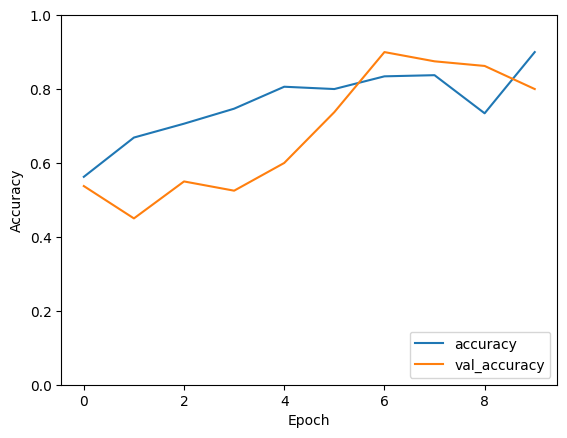

In [45]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)